## Avengers Challenge - Chipax

In [2125]:
import warnings
warnings.filterwarnings("ignore")

Imagina que eres asesor de Tony Stark y tienes el desafío de ayudarlo a dirigir Stark Industries. Para llevar la empresa al éxito, debes entender bien lo que pasa en ella; juntar data sobre tus clientes para entender de donde vienen, como se comportan y proyectar flujos que te ayuden a tomar decisiones para mantener un buen rumbo y evitar la banca rota.

Los equipos de marketing y contabilidad juntaron algunos datos que creen te podrían ayudar a trabajar estos temas y ahora te toca a partir de ellos resolver los siguientes problemas:

1. ¿Qué recomendaciones le darías a Tony para acumular toda la data de la empresa?
    - **Considera data de marketing (canales de adquisición), uso de los productos/servicios, etc.**
        - La primera recomendación sería plantearle la creación de un gobierno de datos, que se preocupe de mantener el orden, la cultura y la transparencia de la información de manera transversal a todas las áreas de la compañía. Esto permitirá saber quién consume los distintos tipos de datos, cómo los consume, y qué tipos de accesos tienen a estos datos. De la mano con lo anterior, el gobierno de datos debería implementar un lenguaje común dentro de la organización que facilite la comunicación entre personas de distintas áreas: Todos deberían manejar conceptos comunes. Por ejemplo, una persona de Analytics y otra persona del área comercial deberían entender de la misma manera los datos de marketing, y el significado de variables como frecuencia de compra, lift, conversión, etc; evitando confusiones a la hora de calcular indicadores. Esta es la base que permitiría crear datalakes robustos, con nomenclaturas claras y variables explicativas que alimenten a todo modelo o análisis que quiera desarrollar la organización.
        
        
   - **Como harías la data accesible para distintos equipos**
        - La idea sería construir datalakes de información, con distintos niveles de permisos y de alcances. Sería bueno crear distintos ambientes dependiendo del perfil de cada integrante del equipo, como por ejemplo ambientes sandbox, ambiente de desarrollo y ambientes productivos. El crear estos ambientes nos permite tener más control sobre la información que se consume, pero sin caer en la burocracia. 
        
        La información puede ser accesible a los equipos de distintas maneras:
        - Se podrían crear dashboards con información ya procesada.
        - Se pueden habilitar vistas con información dentro del datalake para los business analyst o las personas que manejen cierto nivel de SQL.
        - Se pueden habilitar API's para que distintas aplicaciones o modelos de ML consuman los datos.
        - Se pueden crear aplicaciones pequeñas a partir de la información provista por los puntos anteriores.
        
        
        
   - **Que procesos de ETL te imaginas que serían necesarios**
        - Creo que serían necesarios ETL's para limpiar los datos de las campañas de marketing, ya sean nombres, emails, comunas, direcciones, etc.
        - Otro ETL's serviría para enviar toda la información externa de la empresa hacia los datalakes. Por ejemplo, información sobre proveedores, información sobre clientes, información en archivos planos, etc. Esto permitirá alimentar modelos con variables exógenas, pero que a la larga podrían pesar dentro de las predicciones o análisis.
  
  
  
   - **Tipos de datos relevantes para mostrar a distintas áreas**
        - Nivel o métrica de conversión de las campañas. ¿Cuánto generamos de income?
        - Número de la base de contactos.
        - Me imagino que podrían existir KPI's asociados al rendimiento de las campañas. Inversión vs Income.
        - Segmentación de clientes con datos sociodemográficos.
        
      

2. Stark Industries tiene muchos canales de adquisición de clientes (ads en redes sociales, televisión, prensa, SEO, etc) y quisieran saber cuánto aporta cada uno, cómo resolverías lo siguiente: 
    - **¿Cómo definirías el modelo de atribución correcto y por qué?**
        - Primero que todo, los modelos de atribución le permiten saber cuánto peso obtiene cada interacción con un anuncio por sus conversiones, por ejemplo, trackear todo el proceso desde que sale un anuncio hasta que termina comprando. La elección de un modelo se determinará en base a si el modelo permite generar más valor o más conversiones. Si existen datos, se podría armar un modelo de atribución basado en datos, en donde podamos estudiar y segmentar al cliente para que la conversión sea más alta y las campañas sean dirigidas, o 1 a 1. Si no contamos con tantos datos, se puede elegir un modelo de Último click, en donde se asigne todo el peso de la conversión a la última interacción con el anuncio o producto.	
    - **¿Qué herramientas elegirías para la medición?**
        - Google Ads, o Google Analytics, en el caso que estemos trackeando al usuario a través de la página web. Si no, se puede usar el clásico GT/GC (ó grupo tratamiento y de control) para estimar las conversiones y las ganancias que se obtienen a partir de una campaña. SalesForce Marketing Cloud podría ayudar en esto último también.
    - **¿Cuáles son los errores típicos de trackeo que intentarías evitar desde el comienzo?**
        - Tener bien mapeadas las fuentes de los datos. Es importante conocer todos los orígenes de datos, cada cuánto se actualizan y qué tipo de restricciones tienen cada uno.
        - Evitar las duplicaciones en lo posible, sobre todo del email o el teléfono, los cuales son los canales de contacto al final.
        - Un rut puede tener varios emails. Esto es importante de conocer, para así no caer en el SPAM y llenar con notificaciones a los clientes.
        - Una familia podría eventualmente inscribirse en varios canales con un sólo email. Esto suma personas a la base de contactos, pero no suma contactos finales. 
        - Tendría una lista negra de contactos, para conocer a quiénes no deberíamos contactar (por distintos motivos), para así evitar el calcular mal los índices de aperturas o de lectura, y por ende, de conversión.

3. Proyecta los ingresos y egresos para los próximos 2 meses
    - Todos los datos en la planilla son *dummy*, si algo no te hace sentido, cámbialo a tu criterio argumentando de la mejor manera posible
    - Si te faltan datos, invéntalos

### 3. Desarrollo del punto 3.

In [2126]:
# Importamos las librerías necesarias.
import pandas as pd
import numpy as np
from datetime import date, timedelta
pd.set_option('display.max_columns', None)

#visualización
import seaborn as sns
import matplotlib.pyplot as plt

#parámetros para tamaño de los gráficos
plt.rcParams['figure.figsize'] = (18.0, 6.0)

De acuerdo a los datos de la planilla, se tiene lo siguiente
   - Existen algunas filas en la hoja "Datos" que no se usarán para este ejercicio, ya que algunas están en blanco ó tienen títulos sin sentido para el modelo.


In [2127]:
#Se leen los datos desde la planilla modificada.
planilla_chipax = pd.read_excel('Resultado Operacional exportado de Chipax - 1.xlsx', sheet_name='Datos')

In [2128]:
#Muestra de datos
planilla_chipax.head()

Tipo Movimiento Tipo Documento     Folio  Tipo Doc. Ref.  Folio Doc. Ref.  \
0         Ingreso         BOL-EL -202104.0             NaN              NaN   
1         Ingreso         FAC-EL    2024.0             NaN              NaN   
2         Ingreso         FAC-EL    2021.0             NaN              NaN   
3         Ingreso         FAC-EL    2018.0             NaN              NaN   
4         Ingreso         FAC-EL    2023.0             NaN              NaN   

  Fecha (AAAA-MM-DD) Periodo (AAAA-MM)         RUT  \
0         2021-04-01        2021-04-01         NaN   
1         2021-04-12        2021-04-12  76647529-9   
2         2021-04-10        2021-04-10  76388843-6   
3         2021-04-03        2021-04-03  76280791-2   
4         2021-04-10        2021-04-10  76768139-9   

                      Descripción  Monto Neto  Monto Exento       IVA  \
0                             NaN    840336.0           0.0  159664.0   
1                      Bubba Gump    626050.0           0.0  118950.0   
2  Central Nuclear de Springfield    575630.0           0.0  109370.0   
3                    Daily Planet    714286.0           0.0  135714.0   
4                  Empresas Wayne    714286.0           0.0  135714.0   

   IVA Recuperable  IVA No Recuperable  IVA Uso Común  \
0              NaN                 NaN            NaN   
1              NaN                 NaN            NaN   
2              NaN                 NaN            NaN   
3              NaN                 NaN            NaN   
4              NaN                 NaN            NaN   

   Factor de Proporcionalidad  IVA Activo Fijo  Otros Impuestos  Monto Total  \
0                         NaN              NaN              0.0      1000000   
1                         NaN              NaN              0.0       745000   
2                         NaN              NaN              0.0       685000   
3                         NaN              NaN              0.0       850000   
4                         NaN              NaN              0.0       850000   

  Moneda Fecha Clasificación (AAAA-MM-DD) Línea de Negocio Producto Cuenta  \
0    CLP                              NaN              NaN      NaN    NaN   
1    CLP                              NaN              NaN      NaN    NaN   
2    CLP                              NaN              NaN      NaN    NaN   
3    CLP                              NaN              NaN      NaN    NaN   
4    CLP                              NaN              NaN      NaN    NaN   

   Monto Asignado  Comentarios Cuenta Nivel 1 Cuenta Nivel 2 Cuenta Nivel 3  \
0        840336.0          NaN            NaN            NaN            NaN   
1        626050.0          NaN            NaN            NaN            NaN   
2        575630.0          NaN            NaN            NaN            NaN   
3        714286.0          NaN            NaN            NaN            NaN   
4        714286.0          NaN            NaN            NaN            NaN   

  Cuenta Nivel 4  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [2129]:
#Se observa el tipo de datos de la matriz
planilla_chipax.dtypes

Tipo Movimiento                             object
Tipo Documento                              object
Folio                                      float64
Tipo Doc. Ref.                             float64
Folio Doc. Ref.                            float64
Fecha (AAAA-MM-DD)                  datetime64[ns]
Periodo (AAAA-MM)                   datetime64[ns]
RUT                                         object
Descripción                                 object
Monto Neto                                 float64
Monto Exento                               float64
IVA                                        float64
IVA Recuperable                            float64
IVA No Recuperable                         float64
IVA Uso Común                              float64
Factor de Proporcionalidad                 float64
IVA Activo Fijo                            float64
Otros Impuestos                            float64
Monto Total                                  int64
Moneda                         

In [2130]:
#Se observa el tamaño de la matriz
planilla_chipax.shape

(64, 30)

In [2131]:
#Se observa la proporción de datos Nulos dentro de la matriz
planilla_chipax.isnull().sum()

Tipo Movimiento                      0
Tipo Documento                       0
Folio                               31
Tipo Doc. Ref.                      63
Folio Doc. Ref.                     63
Fecha (AAAA-MM-DD)                   0
Periodo (AAAA-MM)                    0
RUT                                 32
Descripción                          1
Monto Neto                          11
Monto Exento                        31
IVA                                 45
IVA Recuperable                     64
IVA No Recuperable                  64
IVA Uso Común                       64
Factor de Proporcionalidad          64
IVA Activo Fijo                     64
Otros Impuestos                     32
Monto Total                          0
Moneda                               1
Fecha Clasificación (AAAA-MM-DD)    32
Línea de Negocio                    33
Producto                            56
Cuenta                              32
Monto Asignado                      23
Comentarios              

Se observan muchos datos vacios (suma de nulos = 64), los cuáles deberán ser descartados o imputados a medida que avanza la solución del problema.

Debido a muchas razones, los siguientes datos serán descartados del análisis. Cada una de las decisiones se explica en la lista a continuación:

- Folio: No relevante para el modelo. Muchos datos nulos.
- Tipo Doc. Ref.: Demasiados nulos para imputar. El dato no sería real finalmente.
- Folio Doc. Ref.: Demasiados nulos para imputar. El dato no sería real finalmente.
- RUT: Dato no relevante para el análisis ni para el modelo.
- Monto Exento: Dato no relevante. Sólo contiene 0's y nulos.
- IVA Recuperable: Nulo completamente. Calculable a partir del "monto total" o del "monto neto", pero no relevante para el modelo.
- IVA No Recuperable: Nulo completamente. Calculable a partir del "monto total" o del "monto neto", pero no relevante para el modelo.
- IVA Uso Común: Nulo completamente. Calculable a partir del "monto total" o del "monto neto", pero no relevante para el modelo.
- Factor de Proporcionalidad: Nulo completamente. Calculable a partir del "monto total" o del "monto neto", pero no relevante para el modelo.
- IVA Activo Fijo: Nulo completamente. Calculable a partir del "monto total" o del "monto neto", pero no relevante para el modelo.
- Otros Impuestos: Dato no relevante. Sólo contiene $0 y nulos.
- Moneda: Sólo contiene la categoría "CLP". No relevante para el modelo.
- Fecha Clasificación (AAAA-MM-DD): Fecha con muchos nulos. Variable poco explicativa. No relevante.
- Producto: Variable contenida como tal en "Cuenta Nivel 3". No relevante.
- Cuenta Nivel 4: Variable contenida como tal en "Cuenta". No relevante.
- Comentarios: Variable nula, no relevante.

In [2132]:
#Descartar datos innecesarios
variables_no_necesarias = ['Folio','Tipo Doc. Ref.','Folio Doc. Ref.','RUT','Monto Exento','IVA Recuperable',
                           'IVA No Recuperable','IVA Uso Común','Factor de Proporcionalidad','IVA Activo Fijo',
                           'Otros Impuestos','Moneda','Fecha Clasificación (AAAA-MM-DD)','Producto','Cuenta Nivel 4','Comentarios']

for variable in variables_no_necesarias:
    del planilla_chipax[variable]

Por otro lado, las variables "Línea de negocio", "Cuenta", "Cuenta Nivel 1", "Cuenta Nivel 2", "Cuenta Nivel 3" se mantienen de la misma forma. Es problabe que se puedan imputar con la moda de la categoría, pero es necesario consultarlo con el negocio. Por mientras, no nos sirven para el análisis.

Los datos restantes serán tratados para poder utilizarlos en los análisis o modelos de regresión.

In [2133]:
planilla_chipax.head(2)

Tipo Movimiento Tipo Documento Fecha (AAAA-MM-DD) Periodo (AAAA-MM)  \
0         Ingreso         BOL-EL         2021-04-01        2021-04-01   
1         Ingreso         FAC-EL         2021-04-12        2021-04-12   

  Descripción  Monto Neto       IVA  Monto Total Línea de Negocio Cuenta  \
0         NaN    840336.0  159664.0      1000000              NaN    NaN   
1  Bubba Gump    626050.0  118950.0       745000              NaN    NaN   

   Monto Asignado Cuenta Nivel 1 Cuenta Nivel 2 Cuenta Nivel 3  
0        840336.0            NaN            NaN            NaN  
1        626050.0            NaN            NaN            NaN

### Crear un Exploratory Data Analysis para los datos restantes

#### Primero que todo, observamos algunas variables categóricas. 

In [2134]:
planilla_chipax['Tipo Movimiento'].unique()

array(['Ingreso', 'Egreso'], dtype=object)

In [2135]:
planilla_chipax['Tipo Documento'].unique()

array(['BOL-EL', 'FAC-EL', 'NC-EL', 'Gasto', 'DIN', 'CodigoSii',
       'Remuneracion'], dtype=object)

No se observan datos sucios o mal homologados. Sólo consultas para el negocio: ¿Qué significan las categorías NC-EL y DIN? Entiendo que BOL-EL y FAC-el podría ser boleta y factura, respectivamente, pero me quedan dudas con las demás categorías.

In [2136]:
#Se ordenan las categorías por alfabeto y se rescatan los valores únicos.
planilla_chipax['Descripción'].sort_values().unique()

array(['Acme Corp', 'Bubba Gump', 'Central Nuclear de Springfield',
       'Central Perk', 'Coco Inc', 'Comisiones', 'Conde Drácula',
       'Consue Gonzalez', 'Daily Planet', 'Dr. Zeus Inc',
       'Eliza Eliza Thornberry', 'Empresas Wayne', 'Gringotts',
       'Homero Simpson', 'Hotel Transilvania', 'LexCorp', 'Mike Wazowski',
       'Monopoly', 'Oscorp', 'Pago intereses cuota 1',
       'Pedro Pablo Gatica', 'Pets',
       'RET. IMP. ÚNICO TRAB. ART. 74 N 1 LIR', 'Retención perdida',
       'Servicio Nacional de Aduanas', 'TRANSBANK S.A.', 'Tony Stark',
       'Transportes Titanic', 'Umbrella Corp', 'Viaje Demo',
       'Viaje capacitación', 'Wonka Industries', 'ida a la demo',
       'intereses crédito', 'viaje capacitación', 'viaje demo', nan],
      dtype=object)

Se crea una homologación para algunas de las categorías que no coinciden, como "viaje capacitación" y "Viaje capacitación".

De todas formas, surgen dudas con las descripciones: 
- Eliza Thornberry = Eliza Eliza Thornberry?

In [2137]:
#Se crea un diccionario
replace_nombre = {'Eliza Eliza Thornberry':'Eliza Thornberry', 
                  'viaje capacitación':'Viaje capacitación',
                  'viaje demo':'Viaje Demo'
                 }

#Se crea la homologación, quitando los espacios y rellenando los nulos con S/I = Sin Información
planilla_chipax['Descripción Nuevo'] = planilla_chipax['Descripción'].replace(replace_nombre).str.strip().fillna('S/I')

Se revisan los resultados de la homologación

In [2138]:
#Se ordenan las categorías por alfabeto y se rescatan los valores únicos.
#Además, se crea un gráfico de distribución de items por Descripción
planilla_chipax['Descripción Nuevo'].sort_values().unique()

array(['Acme Corp', 'Bubba Gump', 'Central Nuclear de Springfield',
       'Central Perk', 'Coco Inc', 'Comisiones', 'Conde Drácula',
       'Consue Gonzalez', 'Daily Planet', 'Dr. Zeus Inc',
       'Eliza Thornberry', 'Empresas Wayne', 'Gringotts',
       'Homero Simpson', 'Hotel Transilvania', 'LexCorp', 'Mike Wazowski',
       'Monopoly', 'Oscorp', 'Pago intereses cuota 1',
       'Pedro Pablo Gatica', 'Pets',
       'RET. IMP. ÚNICO TRAB. ART. 74 N 1 LIR', 'Retención perdida',
       'S/I', 'Servicio Nacional de Aduanas', 'TRANSBANK S.A.',
       'Tony Stark', 'Transportes Titanic', 'Umbrella Corp', 'Viaje Demo',
       'Viaje capacitación', 'Wonka Industries', 'ida a la demo',
       'intereses crédito'], dtype=object)

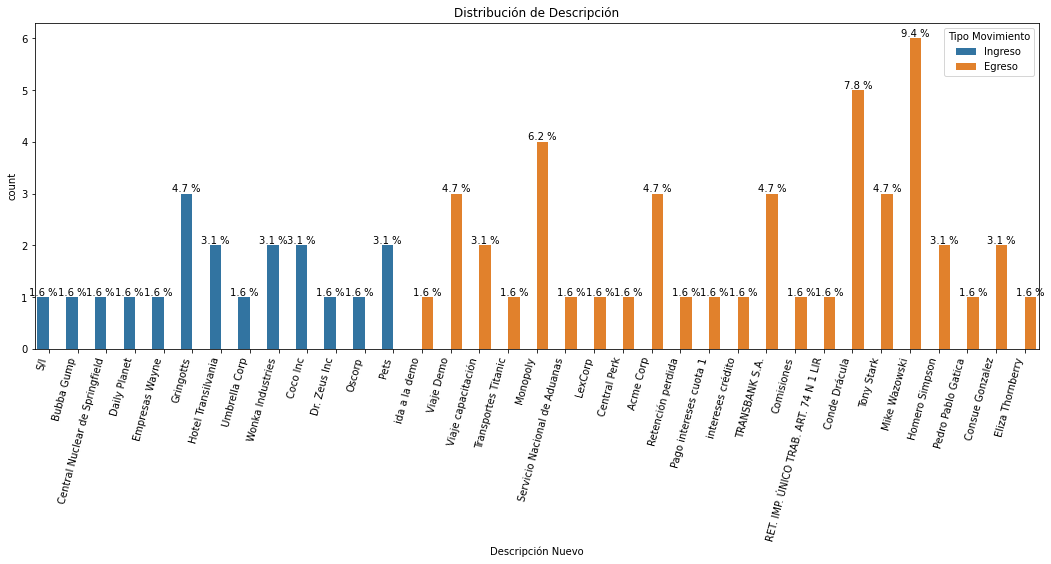

In [2139]:
# Graficar countplot de Descripción
ax = sns.countplot(x="Descripción Nuevo", data=planilla_chipax, hue="Tipo Movimiento")
plt.title("Distribución de Descripción")

# Configuraciones extras
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(y/len(planilla_chipax)*100), (x.mean(), y), ha='center', va='bottom')
    plt.xticks(rotation=75, horizontalalignment='right', fontweight='light')
    

Se observa que los mayores movimientos los aporta Mike Wazowski, seguido por Conde Drácula, y todos corresponden a egresos de la compañía.

Vemos ahora en cuánto dinero se traduce lo anterior:

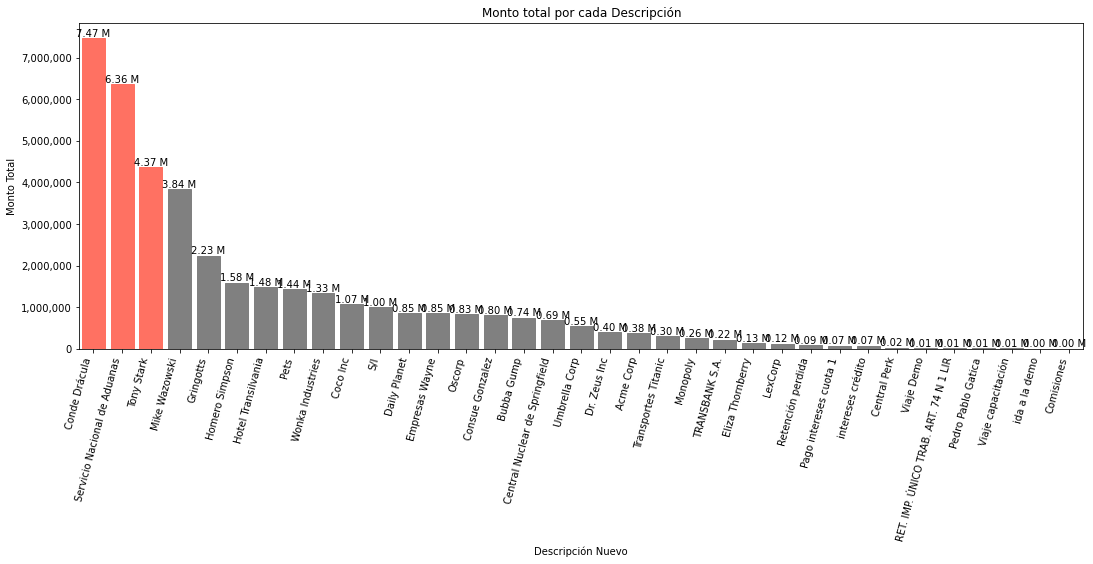

In [2140]:
#Creamos un dataframe agrupado, para poder graficar montos totales por Descripción
datos_agrupados = planilla_chipax.groupby(['Descripción Nuevo','Tipo Movimiento']).sum().sort_values('Monto Total', ascending=False).reset_index()

ax = sns.barplot(x="Descripción Nuevo", y="Monto Total", data=datos_agrupados)
plt.title('Monto total por cada Descripción')

# Algunas configuraciones extras
for p in ax.patches:
    # Pintar primeros 3 valores con otro color 
    if p.get_height() >= min(datos_agrupados['Monto Total'].nlargest(3)):
        p.set_color('#FF7162')    
    else:
        p.set_color('grey')
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f} M'.format(y/1000000), (x.mean(), y), ha='center', va='bottom')
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    plt.xticks(rotation=75, horizontalalignment='right', fontweight='light')

Se observa que los mayores "Montos Totales" son de Conde Drácula, seguido por Servicio Nacional de Aduans y por último Tony Stark, todos ellos correspondiente a egresos.

Al graficar Tipo de Movimiento y Tipo de Documento, la distribución queda así:

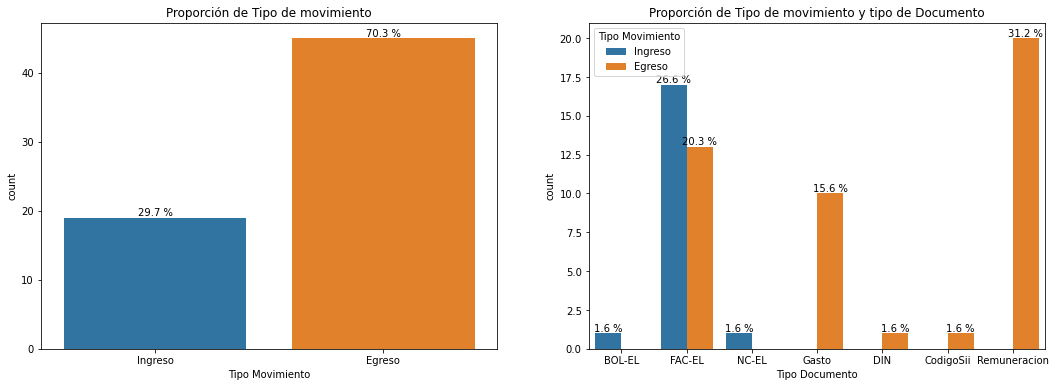

In [2141]:
# Plot 1
plt.subplot(1,2,1)
# Graficar countplot
ax = sns.countplot(x="Tipo Movimiento", data=planilla_chipax)
plt.title("Proporción de Tipo de movimiento")

# Configuraciones extras
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(y/len(planilla_chipax)*100), (x.mean(), y), ha='center', va='bottom')
    
# Plot 2
plt.subplot(1,2,2)
# Graficar countplot
ax = sns.countplot(x="Tipo Documento", data=planilla_chipax, hue="Tipo Movimiento")
plt.title("Proporción de Tipo de movimiento y tipo de Documento")
# Configuraciones extras
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(y/len(planilla_chipax)*100), (x.mean(), y), ha='center', va='bottom')
# Visualizar el gráfico
plt.show()

La mayoría de los Items son de egresos, y en específico, de Remuneración. Por otro lado, el 29,7% de los Ingresos se descompone en BOL-EL, FAC-EL y NC-EL.

### Comparar variables numéricas

In [2142]:
#guardamos un df con los datos numéricos para hacer una correlación
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
chipax_numerico = planilla_chipax.select_dtypes(include=numerics)

In [2143]:
chipax_numerico.head(2)

Monto Neto       IVA  Monto Total  Monto Asignado
0    840336.0  159664.0      1000000        840336.0
1    626050.0  118950.0       745000        626050.0

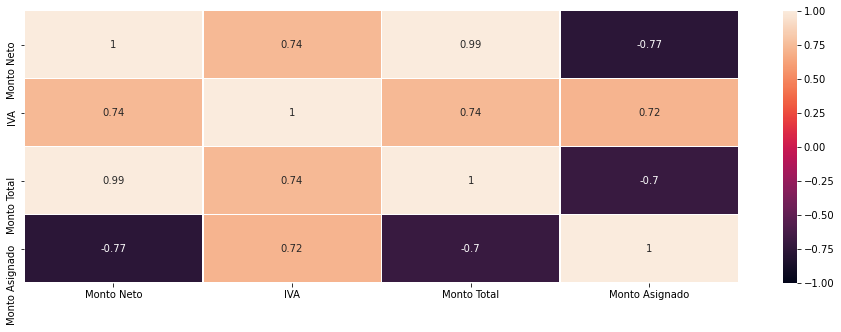

In [2144]:
#plot de las correlaciones. Se ajustan varios parámetros para lograr la correcta visualización de las variables.
plt.figure(figsize = (16,5))
ax = sns.heatmap(chipax_numerico.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size':10}, linewidths=.5)

A simple vista se observa que el monto total con el monto neto e IVA tienen una correlación bastante alta y claro, la correlación debería ser de 1. Estos significa que hay valores que no corresponden en alguno de los 2 datos. Veamos en profundida qué es lo que pasa con esas variables.

#### Análisis a Monto Neto, IVA y Monto Total

In [2145]:
chipax_numerico.isnull().sum()

Monto Neto        11
IVA               45
Monto Total        0
Monto Asignado    23
dtype: int64

Se observa que "Monto Neto" no tiene todo los datos. "Monto Neto" depende del IVA por supuesto, así que también se analizará esa variable.
Primero que todo, veamos si el IVA es consecuente en todas las filas.

In [2146]:
chipax_numerico['IVA calculado'] = round(chipax_numerico['IVA'] * 100 / chipax_numerico['Monto Total'], 4)

In [2147]:
chipax_numerico['IVA calculado'].value_counts()

15.9664    15
15.9665     2
1.6040      1
15.9663     1
Name: IVA calculado, dtype: int64

Según el cálculo realizado, el IVA es de 15.9664 para la mayoría de los items. 2 de los items tiene un IVA de 15.9665. Llama la atención el IVA de 1.6040 que aparece en uno de los items, el cuál podría considerarse un Outlier. La pregunta para el negocio es ¿Es correcto esto?¿El IVA depende de un producto en particular?

Para efectos del ejercicio y en un acto de democracia (ja), se dejará el IVA como 15.9664, ya que la mayoría de los items cuenta con ese resultado.

In [2148]:
chipax_numerico['IVA calculado'] = float(15.9664)

In [2149]:
chipax_numerico['IVA calculado'].value_counts()

15.9664    64
Name: IVA calculado, dtype: int64

Con el IVA calculado, se genera nuevamente variable de "Monto Neto" e "IVA". Los números además serán redondeados.

In [2150]:
#nueva variable del IVA
planilla_chipax['IVA Nuevo'] = round((chipax_numerico['Monto Total'] * chipax_numerico['IVA calculado']) / 100)
#nueva variable de Monto Neto
planilla_chipax['Monto Neto Nuevo'] = round(planilla_chipax['Monto Total'] - planilla_chipax['IVA Nuevo'])

In [2151]:
planilla_chipax.head(3)

Tipo Movimiento Tipo Documento Fecha (AAAA-MM-DD) Periodo (AAAA-MM)  \
0         Ingreso         BOL-EL         2021-04-01        2021-04-01   
1         Ingreso         FAC-EL         2021-04-12        2021-04-12   
2         Ingreso         FAC-EL         2021-04-10        2021-04-10   

                      Descripción  Monto Neto       IVA  Monto Total  \
0                             NaN    840336.0  159664.0      1000000   
1                      Bubba Gump    626050.0  118950.0       745000   
2  Central Nuclear de Springfield    575630.0  109370.0       685000   

  Línea de Negocio Cuenta  Monto Asignado Cuenta Nivel 1 Cuenta Nivel 2  \
0              NaN    NaN        840336.0            NaN            NaN   
1              NaN    NaN        626050.0            NaN            NaN   
2              NaN    NaN        575630.0            NaN            NaN   

  Cuenta Nivel 3               Descripción Nuevo  IVA Nuevo  Monto Neto Nuevo  
0            NaN                             S/I   159664.0          840336.0  
1            NaN                      Bubba Gump   118950.0          626050.0  
2            NaN  Central Nuclear de Springfield   109370.0          575630.0

De esta manera, se observan las nuevas variables en el DataFrame de la planilla.

Calculando nuevamente las correlaciones, se observa que los datos trabajados ahora sí tienen sentido. Correlación perfecta entre Monto Total, Monto Neto e IVA.

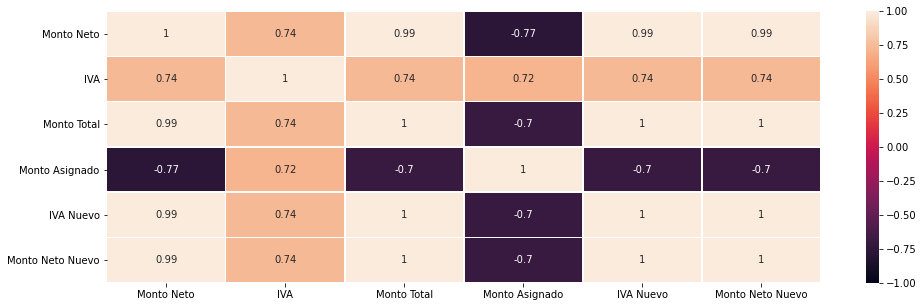

In [2152]:
#plot de las correlaciones. Se ajustan varios parámetros para lograr la correcta visualización de las variables.
plt.figure(figsize = (16,5))
ax = sns.heatmap(planilla_chipax.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size':10}, linewidths=.5)

Por último, se verifica que los Montos Asignados son menores o iguales a los Montos Netos. De lo contrario, se tendrán problemas en el flujo de caja.

In [2153]:
#Se crean los dataframe por categorías
ingresos = planilla_chipax[planilla_chipax['Tipo Movimiento'] == 'Ingreso']
egresos = planilla_chipax[planilla_chipax['Tipo Movimiento'] == 'Egreso']

In [2154]:
#Se crea un nuevo DataFrame para poder comparar los Montos Netos con los Asignados
ingresos_comparar = ingresos[['Monto Neto Nuevo','Monto Asignado']]
egresos_comparar = egresos[['Monto Neto Nuevo','Monto Asignado']]

In [2155]:
#Comparando montos
ingresos_comparar.loc[ingresos_comparar['Monto Neto Nuevo'] < ingresos_comparar['Monto Asignado']]

Empty DataFrame
Columns: [Monto Neto Nuevo, Monto Asignado]
Index: []

- Nada extraño con los ingresos

In [2156]:
egresos_comparar.loc[egresos_comparar['Monto Neto Nuevo'] < (egresos_comparar['Monto Asignado']) * -1]

Monto Neto Nuevo  Monto Asignado
19            2521.0         -3000.0
20            3361.0         -4000.0
21            2017.0         -2400.0
22            3361.0         -4000.0
23            3361.0         -4000.0
24            4706.0         -5600.0
32           71429.0        -85000.0
33           57840.0        -68830.0
34           57840.0        -68830.0
41            1733.0         -2062.0
42            8487.0        -10100.0

- Se observan ciertos errores en los egresos. Esto quiere decir que se está gastando más de lo que se asigna a ciertos items.

### Proyección de los ingresos y egresos para los próximos 2 meses

- Para las proyecciones sólo utilizaremos la variable "Fecha (AAAA-MM-DD)" y "Monto Total", ya que el IVA siempre será el mismo.
- Se deben agrupar los datos por día, para calcular el monto total por día.

In [2157]:
planilla_chipax['Tipo Movimiento'].unique()

array(['Ingreso', 'Egreso'], dtype=object)

In [2158]:
#Se revisa si el dato es correcto
ingresos.head(1)

Tipo Movimiento Tipo Documento Fecha (AAAA-MM-DD) Periodo (AAAA-MM)  \
0         Ingreso         BOL-EL         2021-04-01        2021-04-01   

  Descripción  Monto Neto       IVA  Monto Total Línea de Negocio Cuenta  \
0         NaN    840336.0  159664.0      1000000              NaN    NaN   

   Monto Asignado Cuenta Nivel 1 Cuenta Nivel 2 Cuenta Nivel 3  \
0        840336.0            NaN            NaN            NaN   

  Descripción Nuevo  IVA Nuevo  Monto Neto Nuevo  
0               S/I   159664.0          840336.0

In [2159]:
ingresos.shape

(19, 17)

In [2160]:
#Se observan las fechas disponibles para la proyección
ingresos['Fecha (AAAA-MM-DD)'].sort_values().unique()

array(['2021-04-01T00:00:00.000000000', '2021-04-03T00:00:00.000000000',
       '2021-04-06T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-04-13T00:00:00.000000000',
       '2021-04-16T00:00:00.000000000', '2021-04-17T00:00:00.000000000',
       '2021-04-24T00:00:00.000000000', '2021-04-28T00:00:00.000000000',
       '2021-05-02T00:00:00.000000000', '2021-05-04T00:00:00.000000000',
       '2021-05-05T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [2161]:
#Se revisa si el dato es correcto
egresos.head(1)

Tipo Movimiento Tipo Documento Fecha (AAAA-MM-DD) Periodo (AAAA-MM)  \
19          Egreso          Gasto         2021-05-04        2021-05-04   

      Descripción  Monto Neto  IVA  Monto Total Línea de Negocio  \
19  ida a la demo         NaN  NaN         3000            Legal   

                      Cuenta  Monto Asignado Cuenta Nivel 1   Cuenta Nivel 2  \
19  Honorarios Profesionales         -3000.0         Costos  Costos Directos   

              Cuenta Nivel 3 Descripción Nuevo  IVA Nuevo  Monto Neto Nuevo  
19  Honorarios Profesionales     ida a la demo      479.0            2521.0

In [2162]:
egresos.shape

(45, 17)

In [2163]:
#Se observan las fechas disponibles para la proyección
egresos['Fecha (AAAA-MM-DD)'].sort_values().unique()

array(['2021-03-15T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-26T00:00:00.000000000', '2021-04-27T00:00:00.000000000',
       '2021-04-28T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-05-04T00:00:00.000000000', '2021-05-05T00:00:00.000000000',
       '2021-05-06T00:00:00.000000000', '2021-05-08T00:00:00.000000000',
       '2021-05-10T00:00:00.000000000', '2021-05-15T00:00:00.000000000',
       '2021-05-16T00:00:00.000000000', '2021-05-27T00:00:00.000000000'],
      dtype='datetime64[ns]')

- Se observan muchas fechas faltantes, por lo tanto, datos faltantes para la proyección. A continuación un Histograma de la situación.

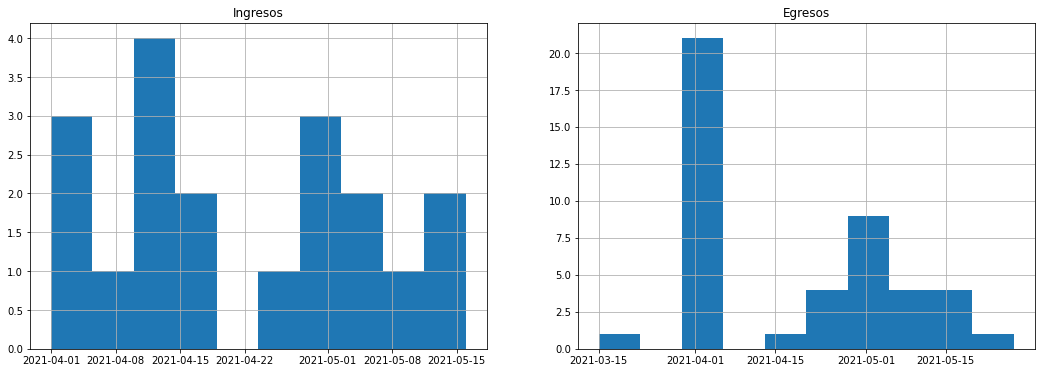

In [2164]:
# Plot 1
plt.subplot(1,2,1)
# Graficar histograma
ingresos['Fecha (AAAA-MM-DD)'].hist()
plt.title("Ingresos")

# Plot 2
plt.subplot(1,2,2)
# Graficar histograma
egresos['Fecha (AAAA-MM-DD)'].hist()
plt.title("Egresos")

# Visualizar el gráfico
plt.show()

#### Se crea un Lineplot para ambos casos, de esta manera, podremos observar la linea temporal vs Montos Totales

In [2165]:
datos_ingresos = ingresos.groupby('Fecha (AAAA-MM-DD)').sum().sort_values('Fecha (AAAA-MM-DD)').reset_index()
datos_egresos = egresos.groupby('Fecha (AAAA-MM-DD)').sum().sort_values('Fecha (AAAA-MM-DD)').reset_index()

In [2166]:
datos_ingresos.head()

Fecha (AAAA-MM-DD)  Monto Neto       IVA  Monto Total  Monto Asignado  \
0         2021-04-01    840336.0  159664.0      1000000        840336.0   
1         2021-04-03   1172269.0  222731.0      1395000       1172269.0   
2         2021-04-06    460504.0   87496.0       548000        460504.0   
3         2021-04-10   1289916.0  245084.0      1535000       1289916.0   
4         2021-04-12    626050.0  118950.0       745000        626050.0   

   IVA Nuevo  Monto Neto Nuevo  
0   159664.0          840336.0  
1   222731.0         1172269.0  
2    87496.0          460504.0  
3   245084.0         1289916.0  
4   118950.0          626050.0

In [2167]:
# Plot 1
plt.subplot(1,2,1)
# Graficar lineplot
ax = sns.lineplot(x="Fecha (AAAA-MM-DD)", y="Monto Total", data=datos_ingresos, marker = 'o', legend='full')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation=75, horizontalalignment='right', fontweight='light')
plt.title("Ingresos")

# Plot 2
plt.subplot(1,2,2)
# Graficar lineplot
ax = sns.lineplot(x="Fecha (AAAA-MM-DD)", y="Monto Total", data=datos_egresos, marker = 'o', legend='full')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation=75, horizontalalignment='right', fontweight='light')
plt.title("Egresos")

# Visualizar el gráfico
plt.show()

#### Debemos imputar los datos faltantes (Fecha y Monto Total) para poder crear el Forecast o Proyección de manera mensual

El método utilizado será el resample diario más una **interpolación con Spline y forward fill**  de los días del mes. A menudo se utiliza la interpolación mediante splines porque obtiene resultados similares requiriendo solamente el uso de polinomios de bajo grado, evitando así las oscilaciones indeseables. Esto suaviza las curvas para ser tratadas de mejor manera.

Además, se **eliminará** el dato del día 15/03 en los egresos, ya que produce un montón de ruido al tratar de armar la curva. Se observa este efecto en el gráfico anterior de egresos. Es bueno agregar también que al hacer el Spline con esta fecha, se producen montos negativos.

In [2168]:
ingresos_proyeccion = datos_ingresos[['Fecha (AAAA-MM-DD)','Monto Total']]
egresos_proyeccion = datos_egresos[['Fecha (AAAA-MM-DD)','Monto Total']]

#### Ingresos

In [2169]:
#Imputamos los datos con el método señalado 
ingresos_proyeccion.set_index(ingresos_proyeccion['Fecha (AAAA-MM-DD)'], inplace=True)
#Se crea el resample con interpolación. Se usan splines para construir la curva y predecir el valor de Monto Total
ingresos_proyeccion = ingresos_proyeccion.resample('D').interpolate(method='spline', order=4, limit_direction='forward', axis=0)
#Se convierte el Monto Total a INT
ingresos_proyeccion['Monto Total'] = ingresos_proyeccion['Monto Total'].astype(int)
#Copiamos el index para poder graficar
ingresos_proyeccion['Fecha (AAAA-MM-DD)'] = ingresos_proyeccion.index

In [2170]:
ingresos_proyeccion.head()

Fecha (AAAA-MM-DD)  Monto Total
Fecha (AAAA-MM-DD)                                
2021-04-01                 2021-04-01      1000000
2021-04-02                 2021-04-02      1619376
2021-04-03                 2021-04-03      1395000
2021-04-04                 2021-04-04       911673
2021-04-05                 2021-04-05       562323

- Se observa que el DataFrame es consistente. Los Montos totales hacen sentido, lo cuál se verá en los gráficos siguientes.

#### Egresos

Para este ejercicio, se eliminan los outliers correspondiente a los egresos. Estos puntos generan grandes curvas que no corresponden a la realidad del dato.

In [2171]:
egresos_proyeccion = egresos_proyeccion[egresos_proyeccion['Fecha (AAAA-MM-DD)'] != '2021-03-15']
egresos_proyeccion = egresos_proyeccion[egresos_proyeccion['Fecha (AAAA-MM-DD)'] != '2021-04-01']
egresos_proyeccion = egresos_proyeccion[egresos_proyeccion['Fecha (AAAA-MM-DD)'] != '2021-04-28']

In [2172]:
egresos_proyeccion.head()

Fecha (AAAA-MM-DD)  Monto Total
2         2021-04-15        68830
3         2021-04-22         2062
4         2021-04-26       300062
5         2021-04-27       167671
7         2021-05-01       114000

In [2173]:
#Imputamos los datos con el método señalado 
egresos_proyeccion.set_index(egresos_proyeccion['Fecha (AAAA-MM-DD)'], inplace=True)
#Se crea el resample con interpolación. Se usan splines para construir la curva y predecir el valor de Monto Total
egresos_proyeccion = egresos_proyeccion.resample('D').interpolate(method='backfill', limit_direction='backward', axis=0)
#Se convierte el Monto Total a INT
egresos_proyeccion['Monto Total'] = egresos_proyeccion['Monto Total'].astype(int)
#Copiamos el index para poder graficar
egresos_proyeccion['Fecha (AAAA-MM-DD)'] = egresos_proyeccion.index

In [2174]:
egresos_proyeccion.head()

Fecha (AAAA-MM-DD)  Monto Total
Fecha (AAAA-MM-DD)                                
2021-04-15                 2021-04-15        68830
2021-04-16                 2021-04-16         2062
2021-04-17                 2021-04-17         2062
2021-04-18                 2021-04-18         2062
2021-04-19                 2021-04-19         2062

- En esta ocasión, y por el tipo de estructura de las fechas faltantes, se tuvo que utilizar un método de backfill para poder imputar los datos faltantes.

Se grafican las curvas finales para observar cómo quedaron:

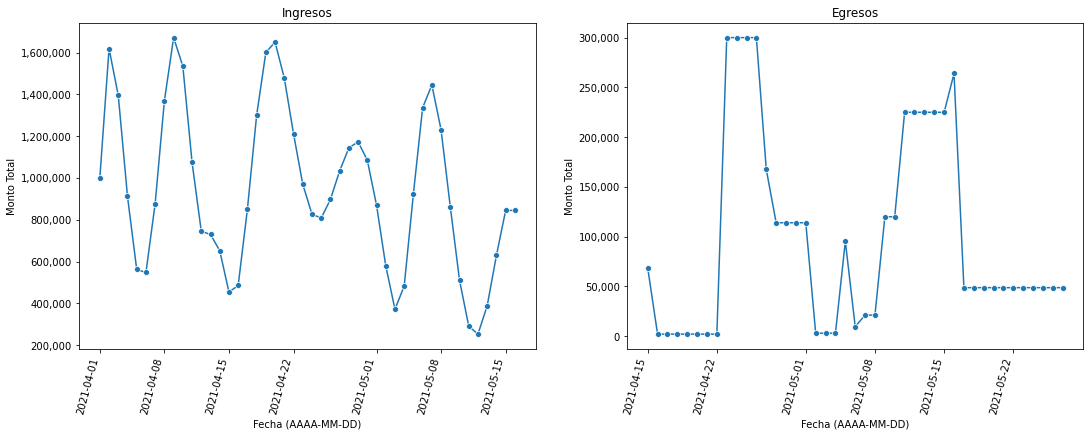

In [2175]:
# Plot 1
plt.subplot(1,2,1)
# Graficar lineplot
ax = sns.lineplot(x="Fecha (AAAA-MM-DD)", y="Monto Total", data=ingresos_proyeccion, marker = 'o', legend='full')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation=75, horizontalalignment='right', fontweight='light')
plt.title("Ingresos")

# Plot 2
plt.subplot(1,2,2)
# Graficar lineplot
ax = sns.lineplot(x="Fecha (AAAA-MM-DD)", y="Monto Total", data=egresos_proyeccion, marker = 'o', legend='full')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.xticks(rotation=75, horizontalalignment='right', fontweight='light')
plt.title("Egresos")

# Visualizar el gráfico
plt.show()

Cabe destacar algunos puntos:
   - La curva de Ingresos se ve bien, tiene una forma no estacionaria y se podría lanzar una proyección con los datos.
   - La curva de Egresos está un poco complicada. ¿Se debe descartar el día 01/04 para el análisis? Este dato claramente es un Outlier, pero lamentablemente acumula mucha información con respecto a remuneraciones, no así el día 01/05.
   - Los días 15/03 y 28/04 al parecer son Outliers también, por lo tanto, fueron reemplazados por el promedio general.

### Comenzando las proyecciones:

In [2176]:
# Importar Prophet para las proyecciones
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

# Importar ExponentialSmoothing para tener otra opción de proyección
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

Para tener en cuenta:
- Prophet = Trend + Seasonality + Holiday + error

In [2177]:
holidays = pd.DataFrame({
  'holiday': 'feriados en Chile',
  'ds': pd.to_datetime(['2021-04-02', '2021-04-03', '2021-05-01']),
  'lower_window': 0,
  'upper_window': 1,
})

En esta ocasión, podemos añadir un holiday el día 01/05 por el día del trabajador. Además, se añade parte de la semana santa (02/04 y 03/04)

### Proyección de Ingresos

In [2178]:
# Al usar Prophet, por obligación de la librería debemos cambiar los nombres de las columnas.
#DS es la fecha e Y es el Monto Total
ingresos_proyeccion.columns = ['ds', 'y']
ingresos_proyeccion['ds'] = pd.to_datetime(ingresos_proyeccion['ds'])

# definimos un modelo Prophet, con una estacionalidad semanal = False
model = Prophet(weekly_seasonality=False,
                holidays=holidays)

# tomando en cuenta los datos, se crea una estacionalidad mensual para los ingresos
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# entrenar el modelo
model.fit(ingresos_proyeccion)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [2179]:
# Creamos el mock para los 2 meses de proyección
future = model.make_future_dataframe(periods=60)
future.tail()

ds
101 2021-07-11
102 2021-07-12
103 2021-07-13
104 2021-07-14
105 2021-07-15

In [2180]:
# creamos la predicción para los 2 meses
forecast = model.predict(future)
# obtenemos los números de predicción, cota inferior y cota superior del margen de predicción.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
101 2021-07-11  312558.126131   -1688.397090  665265.656908
102 2021-07-12  155779.326487 -176586.181292  469438.886817
103 2021-07-13  102252.347444 -218808.919294  446694.297360
104 2021-07-14  116399.466414 -212284.765406  427788.958756
105 2021-07-15  140356.925473 -157441.058038  482284.887993

#### Se grafican los datos con su proyección. Se ve una clara tendencia negativa.

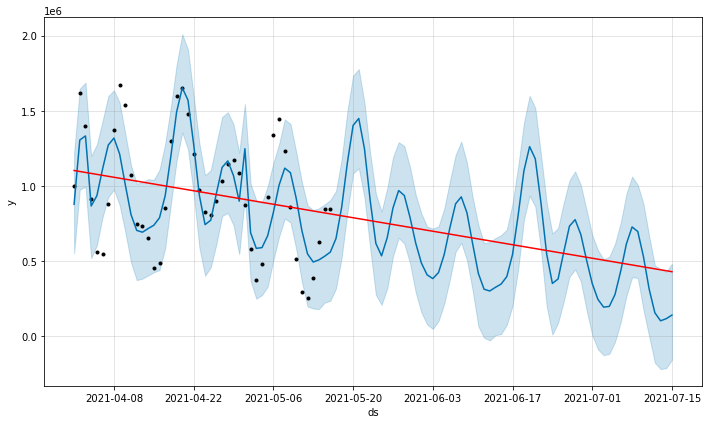

In [2181]:
fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model, forecast)

- Se observa que las proyecciones al parecer están bien. Se nota además la tendencia a la baja y que los intervalos de confianza se comportan de buena manera con respecto a la curva original. 

#### Calculando la performance del modelo

In [2182]:
# primero, se importa la librería para calcular un R2
from sklearn.metrics import r2_score

In [2183]:
# se crea un dataframe con las proyecciones por día, para luego calcular los errores.
metric_df = forecast.set_index('ds')[['yhat']].join(ingresos_proyeccion.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [2184]:
# se proyecta el RMSE
r2_score(metric_df.y, metric_df.yhat)

0.5660185045258118

- Como se puede observar, el modelo no se ajusta lo bastante bien a la curva. Faltan datos!

Ahora, utilizando la misma librería de Prophet, podemos visualizar algunas métricas.

In [2185]:
# Se obtienen las metricas con un cross validation y con periodos de 21 dias
from fbprophet.diagnostics import cross_validation
metricas = cross_validation(model, initial='21 days', period='21 days', horizon = '21 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-04-25 00:00:00 and 2021-04-25 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [2186]:
# se plotea el cross validation anterior con una métrica conocida: RMSE
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(metricas, metric='rmse')

- El RMSE al parecer va aumentando a medida que van pasando los días.

In [2187]:
# Se calcula un horizonte con las distintas métricas disponibles
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(metricas)
df_p.head(15)

horizon           mse          rmse           mae       mape      mdape  \
0   2 days  5.588809e+11  7.475834e+05  6.919431e+05   0.699487   0.699487   
1   3 days  1.258876e+12  1.121997e+06  1.113420e+06   1.018792   1.018792   
2   4 days  1.069344e+12  1.034091e+06  1.003922e+06   0.869346   0.869346   
3   5 days  4.772637e+11  6.908428e+05  6.874361e+05   0.607211   0.607211   
4   6 days  2.755854e+12  1.660076e+06  1.441784e+06   1.585900   1.585900   
5   7 days  9.685589e+12  3.112168e+06  3.019290e+06   4.554267   4.554267   
6   8 days  1.734138e+13  4.164298e+06  4.147507e+06   9.334496   9.334496   
7   9 days  1.816359e+13  4.261876e+06  4.253466e+06  10.207243  10.207243   
8  10 days  1.209006e+13  3.477077e+06  3.432816e+06   5.682774   5.682774   
9  11 days  6.441192e+12  2.537950e+06  2.511016e+06   2.358187   2.358187   
10 12 days  4.820417e+12  2.195545e+06  2.194913e+06   1.579181   1.579181   
11 13 days  6.938244e+12  2.634055e+06  2.609124e+06   1.984859   1.984859   
12 14 days  1.134154e+13  3.367720e+06  3.346665e+06   3.367476   3.367476   
13 15 days  1.529663e+13  3.911091e+06  3.906756e+06   6.163040   6.163040   
14 16 days  1.650202e+13  4.062268e+06  4.062167e+06  10.936055  10.936055   

    coverage  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0  
11       0.0  
12       0.0  
13       0.0  
14       0.0

- Se observa que el modelo no está bien ajustado a los datos en las distintas métricas. Lo más probable es que faltan datos para crear una buena aproximaxión. cabe destacar que tampoco ayuda mucho la creación de datos sintéticos para llenar los días faltantes.


#### Por último, se grafican los componentes de la curva con su proyección. Claramente la tendencia es a la baja.

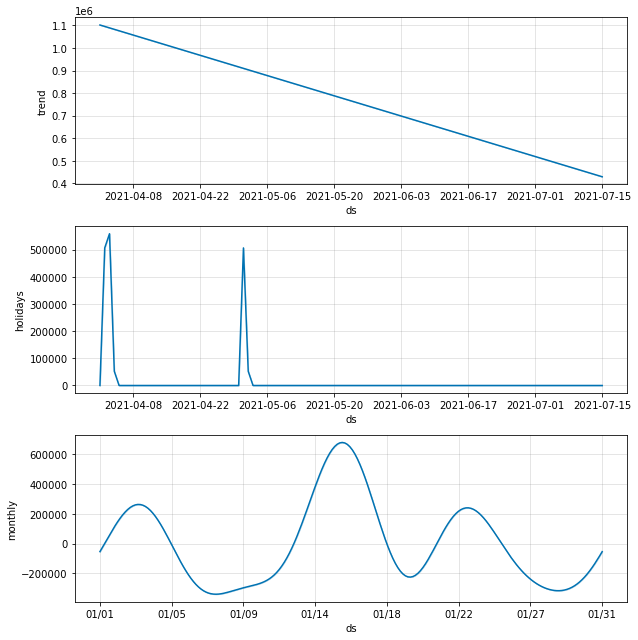

In [2188]:
fig2 = model.plot_components(forecast)

- Tendencia a la baja, con los holidays marcados.

### Se repite el proceso con los Egresos

Para este ejercicio, eliminamos el Outlier del 04/01 ya que causa un montón de ruido en la proyección.

In [2189]:
# Al usar Prophet, por obligación de la librería debemos cambiar los nombres de las columnas.
#DS es la fecha e Y es el Monto Total
egresos_proyeccion.columns = ['ds', 'y']
egresos_proyeccion['ds']= pd.to_datetime(egresos_proyeccion['ds'])

# definimos un modelo Prophet, con una estacionalidad semanal = False
model_egreso = Prophet(weekly_seasonality=False,
                       holidays=holidays)

# tomando en cuenta los datos, se crea una estacionalidad mensual para los ingresos
model_egreso.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# entrenar el modelo
model_egreso.fit(egresos_proyeccion)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [2190]:
# Creamos el mock para los 2 meses de proyección
future = model_egreso.make_future_dataframe(periods=60)
future.tail()

ds
98  2021-07-22
99  2021-07-23
100 2021-07-24
101 2021-07-25
102 2021-07-26

In [2191]:
# creamos la predicción para los 2 meses
forecast = model_egreso.predict(future)
# obtenemos los números de predicción, cota inferior y cota superior del margen de predicción.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat     yhat_lower     yhat_upper
98  2021-07-22 -44238.887140 -127832.031377   38484.330313
99  2021-07-23   8868.674623  -77800.126827   98086.663011
100 2021-07-24  61245.696452  -25326.062608  149270.172067
101 2021-07-25  89399.329995     483.908645  173669.916820
102 2021-07-26  83472.969463    -812.875553  169789.999803

#### Se grafican los datos con su proyección. Se ve una clara tendencia negativa.

In [2192]:
fig1 = model_egreso.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), model_egreso, forecast)

- Se ve que hay muchos problemas para poder predecir bien los valores. Para este ejercicio, no tiene sentido realizar un análisis de las métricas de error.

#### Se grafican los componentes de la curva con su proyección. Nuevamente la tendencia es a la baja.

In [2193]:
fig2 = model_egreso.plot_components(forecast)

#### Haciendo una pequeña prueba para los egresos, demostrando si la curva es o no estacionaria.

La intuición detrás de una prueba de raíz unitaria es que determina la fuerza con la que una serie de tiempo está definida por una tendencia.

In [2194]:
# Se importa el log y la prueba de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Se transforma el conjunto de datos para hacer que la distribución de valores sea más lineal 
# y cumplir mejor con las expectativas de esta prueba estadística.

X = log(egresos_proyeccion['y'])
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.254714
p-value: 0.649628
Critical Values:
	1%: -3.654
	5%: -2.957
	10%: -2.618


La prueba de Dickey-Fuller sugiere que no podemos rechazar la hipótesis nula con un nivel de significancia de menos del 1% (es decir, una probabilidad baja de que el resultado sea una casualidad estadística).

La baja probabilidad de rechazar la hipótesis nula significa que el proceso tiene raíz unitaria y, a su vez, la serie de tiempo NO es estacionaria o tiene una estructura dependiente del tiempo. Para seguir con el trabajo, se debe estacionar la serie a través de diferenciaciones. Este paso no se alcanzó a realizar.

## Conclusiones de las proyecciones.

- La curva de egresos es No estacionaria, por lo tanto, es un poco complicado armar las predicciones.
- Existían muchos datos sin sentido o poco explicativos dentro del modelo.
- Se trató de imputar los datos de la mejor manera, utilizando forwards, backwards y Splines. Esto último permitió suavizar las curvas de la manera correcta, para poder predecir con errores controlados.
- Se intentó utilizar Holt-Winter para las proyecciones, pero por temas de tiempo no pudo ser implementado. Es otra variante importante a considerar en las series de tiempo.